In [1]:
using Plots
include("DGP.ji")

main (generic function with 3 methods)

In [103]:
α = [-1, 2] # single index for x
θ = [2, 1]  # linear for x, <α, θ> = 0 for identification
# γ = [0, 0]
# β = [0, -0]
γ = [1, 2] # single index for z
β = [1, -0.5] # linear for z

# Q(y|x, z) = Xθ + Zβ + g(Xα + Zγ)

n = 500
# p = length(α)
# q = length(γ)

500

In [104]:
include("qgplsim.ji")
τ = 0.5
X, Z, y = dgp(n, γ, θ, α, β, true)
model1 = qgplsim.model(X, Z, y)
@time alpha, theta, gamma = qgplsim.estimator(model1)

  6.786340 seconds (92.61 M allocations: 9.803 GiB, 27.90% gc time, 17.09% compilation time)


([-0.35638787572568575, 0.9212271955478228], [1.9207053236103868 0.7685931898316819], [-0.14674284781851307, -0.649415158490817])

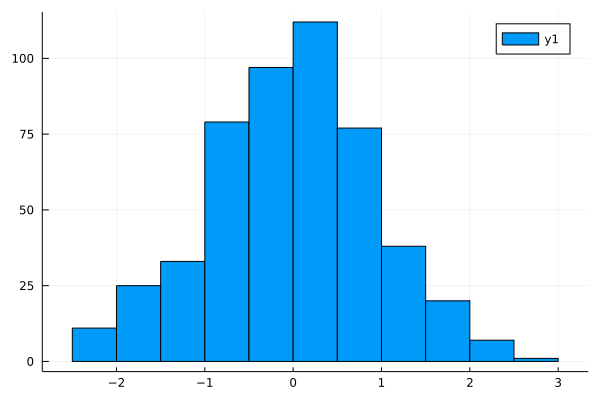

In [93]:
v = X * alpha # g(Xα + Zγ) => univar func. g(v + zγ) after α was determined and  Z = z
histogram(v)

In [94]:
g, dg = qgplsim.Gz_DGz(v, Z, y) # g: g(v), dg: g'(v)

([5.320542336765631, 2.1305590805417545, 5.533001044946678, 1.8476184251458876, 1.565626318095269, 1.464070802351187, 4.332834452943177, 6.11919234347056, 2.0313901479655097, 0.20157053321132734  …  1.5427274667067823, 1.9914856907061798, 3.262125322633767, 1.7126888967611642, 3.2520313531651333, -0.10019384439433093, 1.1820004045886594, 0.09356118076358122, 0.21447955048807837, 4.950170848471452], [4.280781046966221, 2.2021446102163065, 5.678003209054931, 2.178629674651765, 0.21339910733447967, -0.0467389788934056, 0.33875651963999737, 1.0403536820593775, 2.1868654552306936, 1.95851199288815  …  0.21361746876562773, 4.210077811825079, 2.3179717577763315, 2.184345516298556, 3.2861805748975326, -0.5645059746978753, 1.4752937931708991, -0.4571353846763052, 0.18142190950843773, 1.4729325545333172])

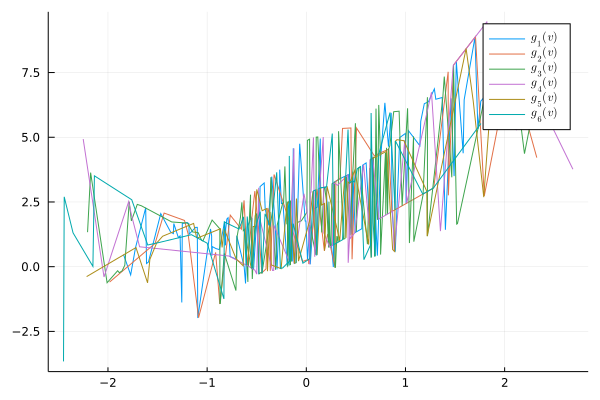

In [95]:
using LaTeXStrings
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    gm = g[index[categ[m]]]
    indm = sortperm(vm)
    sorted_gm = gm[indm]
    sorted_vm = vm[indm]

    plot!(fig, sorted_vm, sorted_gm, label = L"g_{%$m} (v)")

end
fig

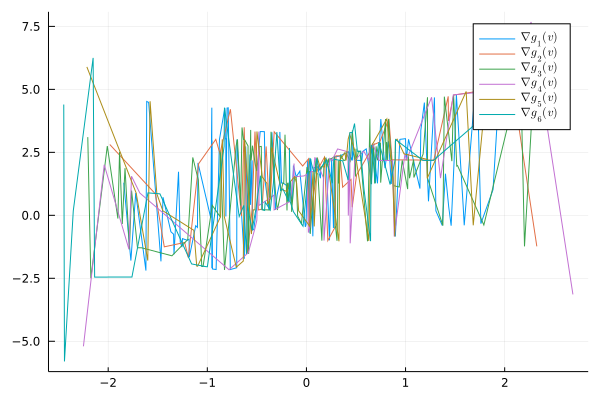

In [97]:
fig = plot()
for m in 1:6
    vm = v[index[categ[m]]]
    dgm = dg[index[categ[m]]]
    indm = sortperm(vm)
    sorted_dgm = dgm[indm]
    sorted_vm = vm[indm]
    plot!(fig, sorted_vm, sorted_dgm, label = L"\nabla g_{%$m} (v)")

end
fig

In [105]:
Theta = zeros(100, p)
Alpha = zeros(100, p)
Gamma = zeros(100, p)
import Base.Threads.@threads

In [109]:
t = time()
len = 50
@threads for i in 1:2
        for j in 1:len
    X, Z, y = dgp(n, γ, θ, α, β, true)
    model_ij = qgplsim.model(X, z, y)
    Alpha[len*(i - 1) + j, :], Theta[len*(i - 1) + j, :],Gamma[len*(i - 1) + j, :] = qgplsim.estimator(model_ij)
    end
end
println("MC Computing time: ", time() - t)
println(sum(Alpha, dims = 1))
println(sum(Theta, dims = 1))
println(sum(Gamma, dims = 1))


MC Computing time: 1104.6854610443115
[5.913489145929477 -9.052962736348034]
[168.9099722273829 125.86326494394594]


In [110]:
ct, dc, mc = qgplsim.collection(sign.(Alpha))

(Any[[1.0, 1.0], [-1.0, 1.0], [1.0, -1.0], [-1.0, -1.0]], Dict{Any,Any}([1.0, 1.0] => [1, 29, 54, 69, 82],[-1.0, -1.0] => [16, 20, 23, 26, 48, 91],[-1.0, 1.0] => [2, 3, 5, 6, 7, 8, 11, 13, 19, 22  …  78, 83, 84, 85, 86, 87, 90, 92, 98, 99],[1.0, -1.0] => [4, 9, 10, 12, 14, 15, 17, 18, 21, 25  …  80, 81, 88, 89, 93, 94, 95, 96, 97, 100]), [1.0, -1.0])

In [111]:
mc

2-element Array{Float64,1}:
  1.0
 -1.0

In [112]:
rAlpha = Alpha[dc[mc], :]
rTheta = Theta[dc[mc], :]
rGamma = Gamma[dc[mc], :]
ns, = size(rAlpha)

(50, 2)

In [113]:
sum(rAlpha, dims = 1)/ns

1×2 Array{Float64,2}:
 0.533028  -0.762103

In [114]:
sum(rTheta, dims = 1)/ns

1×2 Array{Float64,2}:
 1.89899  1.41293

In [ ]:
sum(rGamma, dims = 1)/ns